In [82]:
import numpy as np
import pandas as pd


from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import NMF, TruncatedSVD, PCA
from sklearn.utils import shuffle

In [83]:
test = pd.read_csv('C:/Users/admin/Desktop/Coursera DATA SCIENCE/6 курс. ПРОЕКТ/Отзывы на фильмы/products_sentiment_test.tsv', sep='\t', index_col = 0)
train = pd.read_csv('C:/Users/admin/Desktop/Coursera DATA SCIENCE/6 курс. ПРОЕКТ/Отзывы на фильмы/products_sentiment_train.tsv', names=['text', 'label'], header=0, sep='\t')

In [84]:
X = train['text'].values
y = train['label'].values
X_test = test['text'].values

In [85]:
def text_classifier_short(vectorizer, classifier):
    return Pipeline(
            [("vectorizer", vectorizer),
            ("classifier", classifier)])

In [86]:
stopWords_nltk = set(stopwords.words('english'))
from sklearn.feature_extraction import text
stopWords_skl= set(text.ENGLISH_STOP_WORDS)

In [87]:
for clf in [LogisticRegression, LinearSVC, SGDClassifier]:
    print(clf)
    print(cross_val_score(text_classifier_short(CountVectorizer(), clf(max_iter=1000)), X, y).mean())
    print("\n")

<class 'sklearn.linear_model.logistic.LogisticRegression'>
0.7733783258520889


<class 'sklearn.svm.classes.LinearSVC'>


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will ch

0.7508723115919517


<class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>
0.7538678108393251




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [88]:
print(cross_val_score(text_classifier_short(CountVectorizer(), LogisticRegression(C =0.75,  max_iter=1000)), X, y).mean())

0.7743785764775271


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
model = text_classifier_short(CountVectorizer(), LogisticRegression(C =0.75, max_iter=100))

In [92]:
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=0.75, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
            

In [93]:
y_test = model.predict(X_test)

In [94]:
answer = pd.DataFrame(data ={'Id' : np.arange(0, len(y_test)),'y': y_test})

In [95]:
answer.to_csv('submission.csv', index=False)

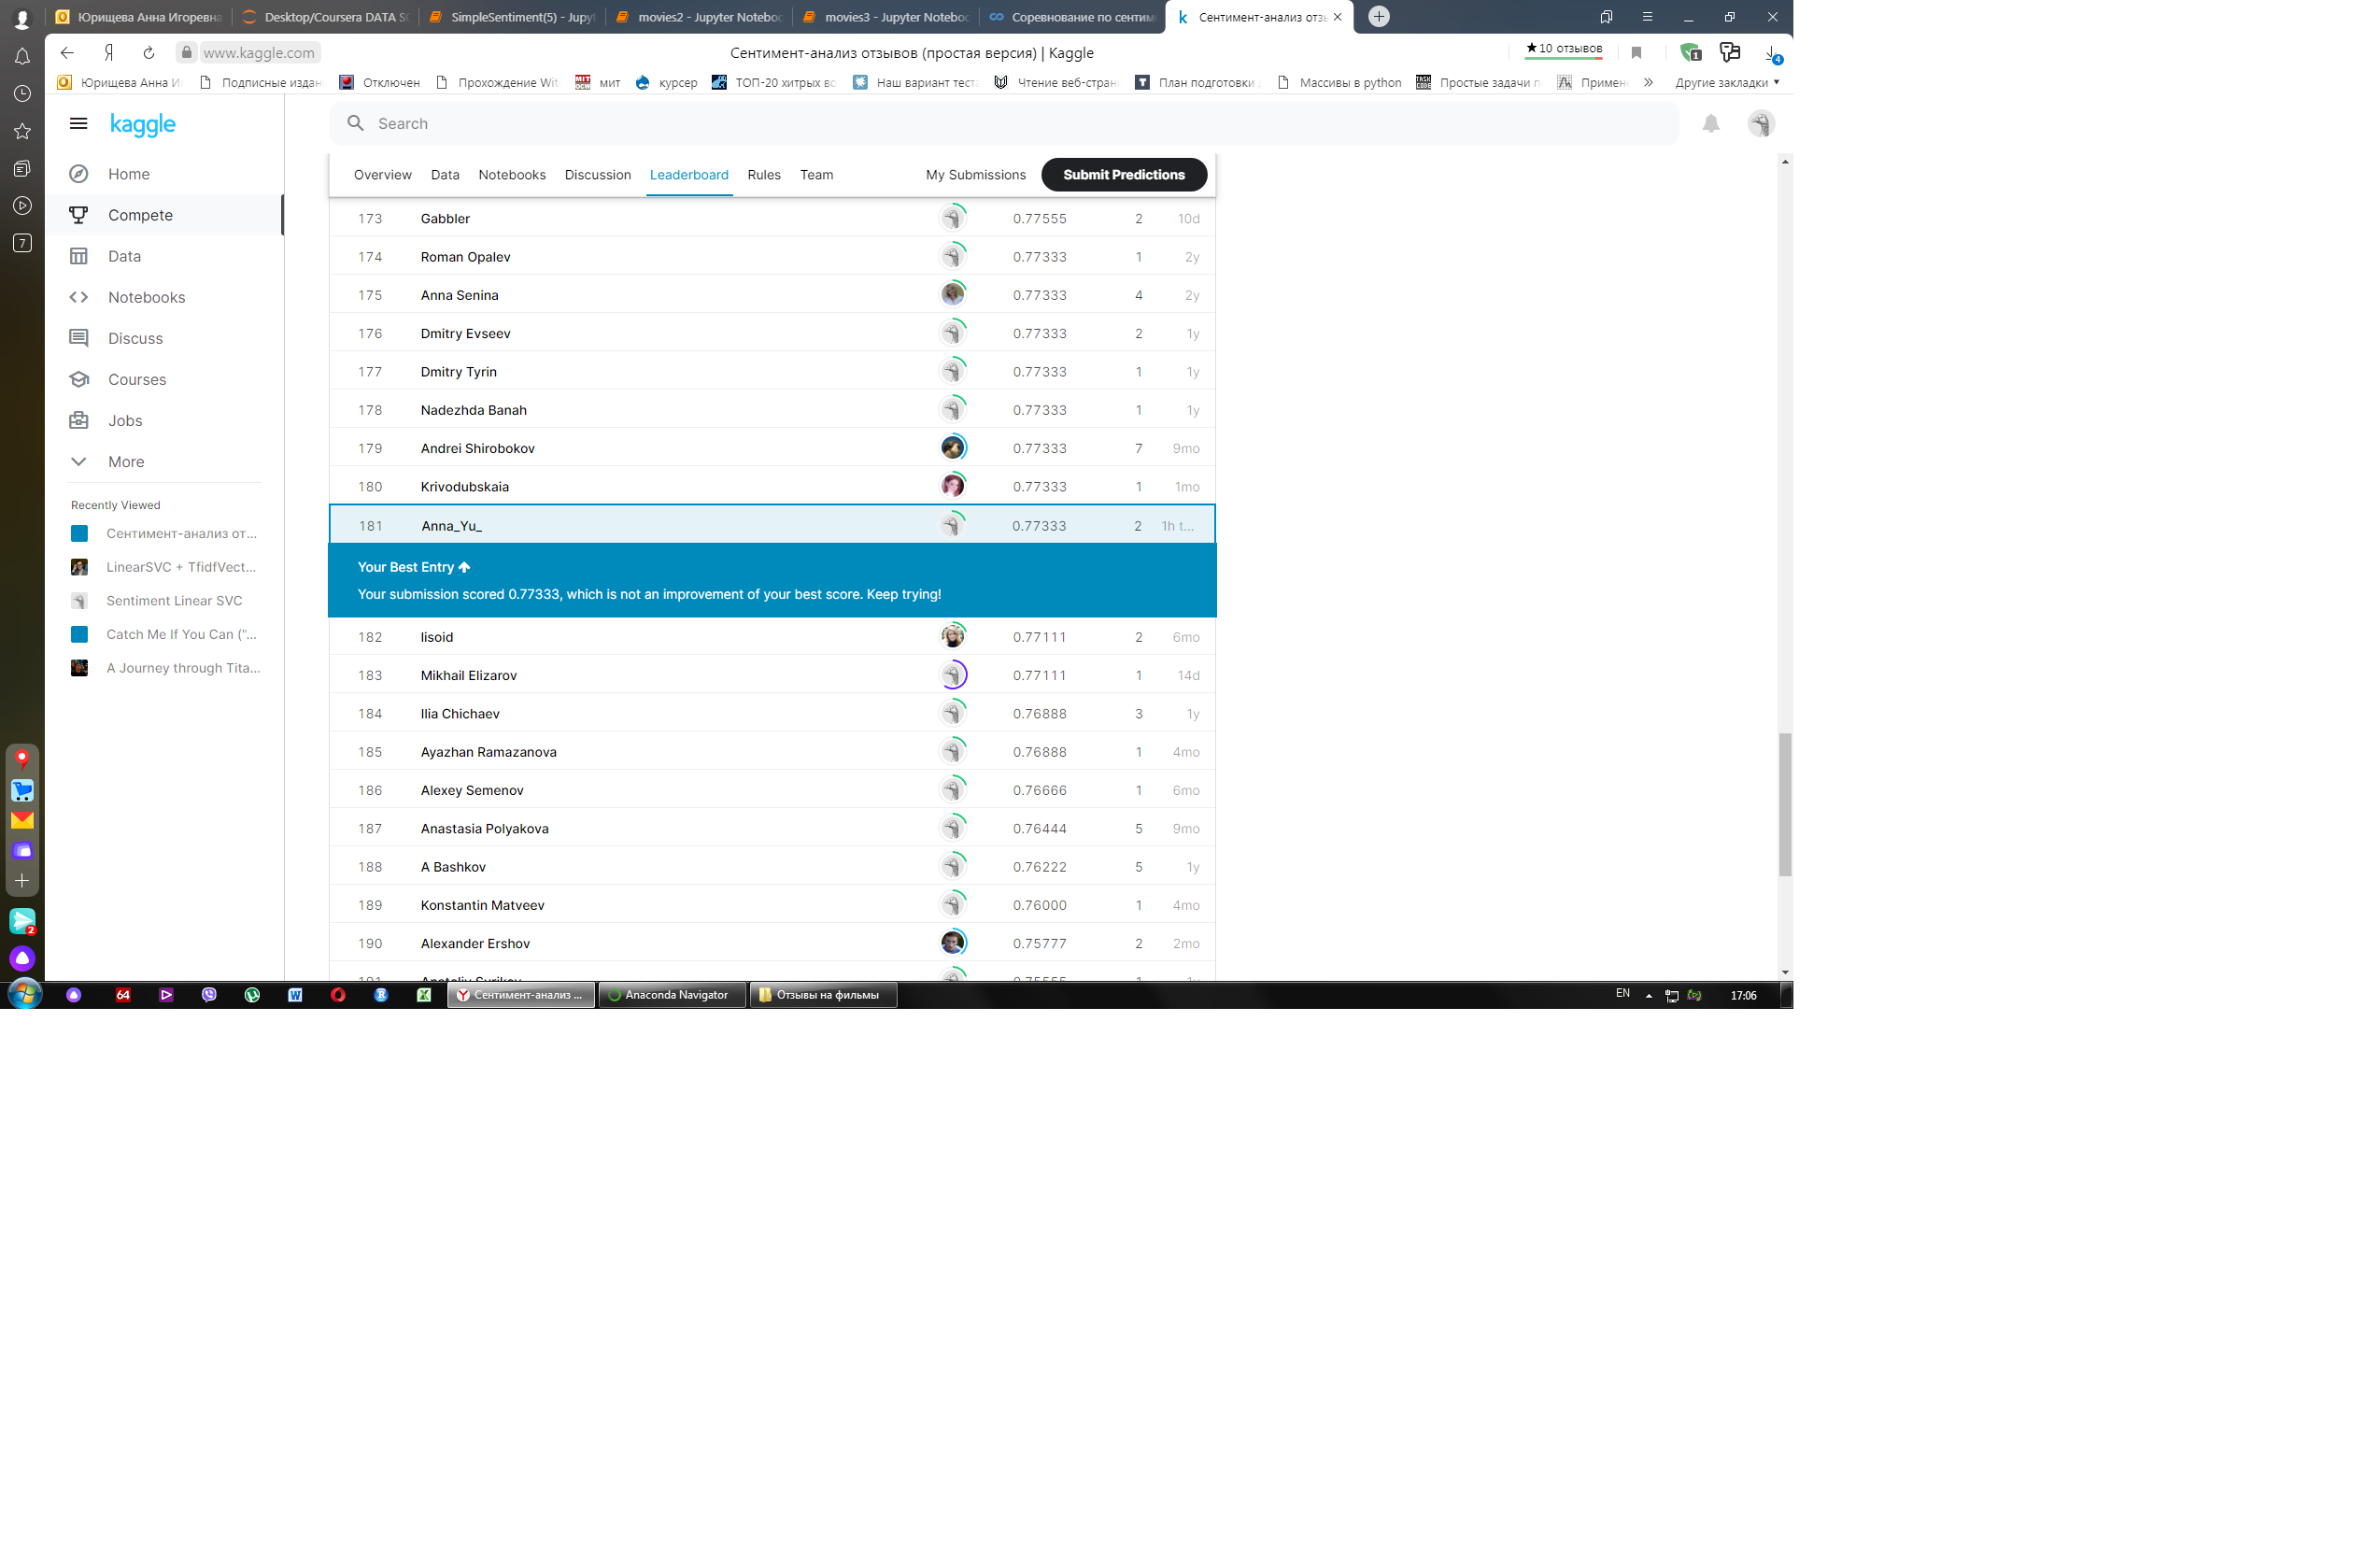

In [96]:
from IPython.display import Image

Image(filename = 'C:/Users/admin/Desktop/Coursera DATA SCIENCE/6 курс. ПРОЕКТ/Отзывы на фильмы/kaggle1.png')